<a href="https://colab.research.google.com/github/Siddhantvs/21BDS0137_EDA_TheoryDA/blob/main/EDA_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Siddhant Saraf


Reg.No: 21BDS0137


Github: https://github.com/Siddhantvs/21BDS0137_EDA_TheoryDA

Module 2: Data Transformation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture

In [ ]:
# Loading the cps91 dataset
df = pd.read_csv('/content/cps91.csv')

In [ ]:
# Data Deduplication
print("Duplicates before removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after removal:", df.duplicated().sum())

Duplicates before removal: 0
Duplicates after removal: 0


In [ ]:
# Removing duplicates based on 'husage' column and replacing values if needed
df = df.drop_duplicates(subset=['husage'])

In [ ]:
# Replacing Values
df['husage'].replace(-1, np.nan, inplace=True)

<ipython-input-6-7208b3f61d95>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['husage'].replace(-1, np.nan, inplace=True)


In [ ]:
# Discretization and Binning for `hours`
bins = [0, 20, 40, 60, 80]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Hours_Binned'] = pd.cut(df['hours'], bins=bins, labels=labels)

In [ ]:
# Handling Missing Data
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the mean of numerical columns
numerical_means = df[numerical_cols].mean()

# Fill missing values in numerical columns with their respective means
df[numerical_cols] = df[numerical_cols].fillna(numerical_means)

In [ ]:
# Maximum Likelihood Estimation for Missing Data
def impute_mle(column):
    column = column.dropna().values.reshape(-1, 1)
    gm = GaussianMixture(n_components=1, random_state=0)
    gm.fit(column)
    return gm.sample(n_samples=len(df))[0].flatten()

In [ ]:
# Apply MLE (Example: `lwage`)
if df['lwage'].isnull().sum() > 0:
    df['lwage'] = impute_mle(df['lwage'])

In [81]:
# Creating an interaction term between 'husage' and 'husearns'
df['usage_earnings_interaction'] = df['husage'] * df['husearns']

In [82]:
# One-hot encoding for 'husunion' (husband union status)
df = pd.get_dummies(df, columns=['husunion'], drop_first=True)

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['husage', 'husearns', 'age']] = scaler.fit_transform(df[['husage', 'husearns', 'age']])

Module 3: Correlation Analysis and Time Series Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

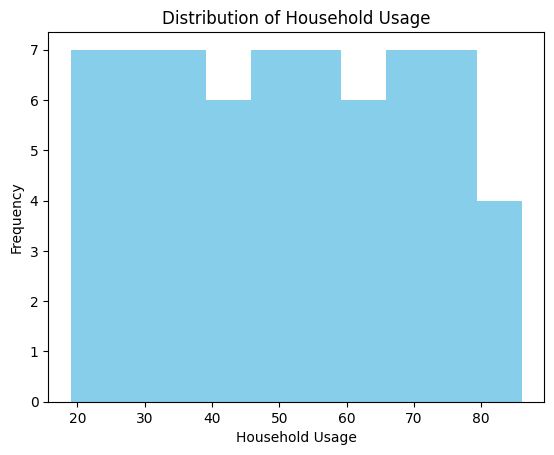

In [ ]:
# Univariate Analysis: Histogram of 'husage'
plt.hist(df['husage'], bins=10, color='skyblue')
plt.title('Distribution of Household Usage')
plt.xlabel('Household Usage')
plt.ylabel('Frequency')
plt.show()

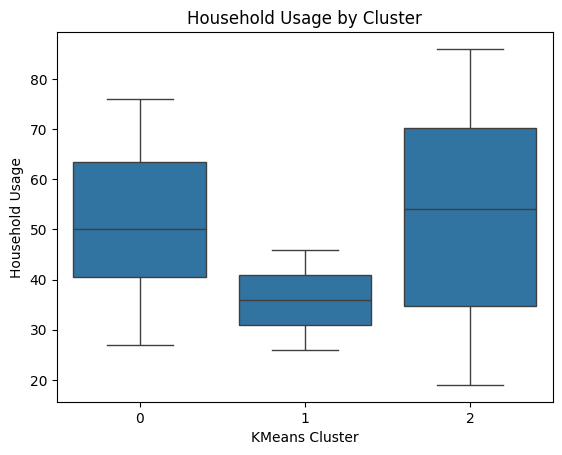

In [ ]:
# Bivariate Analysis: Boxplot of 'husage' by 'KMeansCluster'
sns.boxplot(data=df, x='KMeansCluster', y='husage')
plt.title('Household Usage by Cluster')
plt.xlabel('KMeans Cluster')
plt.ylabel('Household Usage')
plt.show()

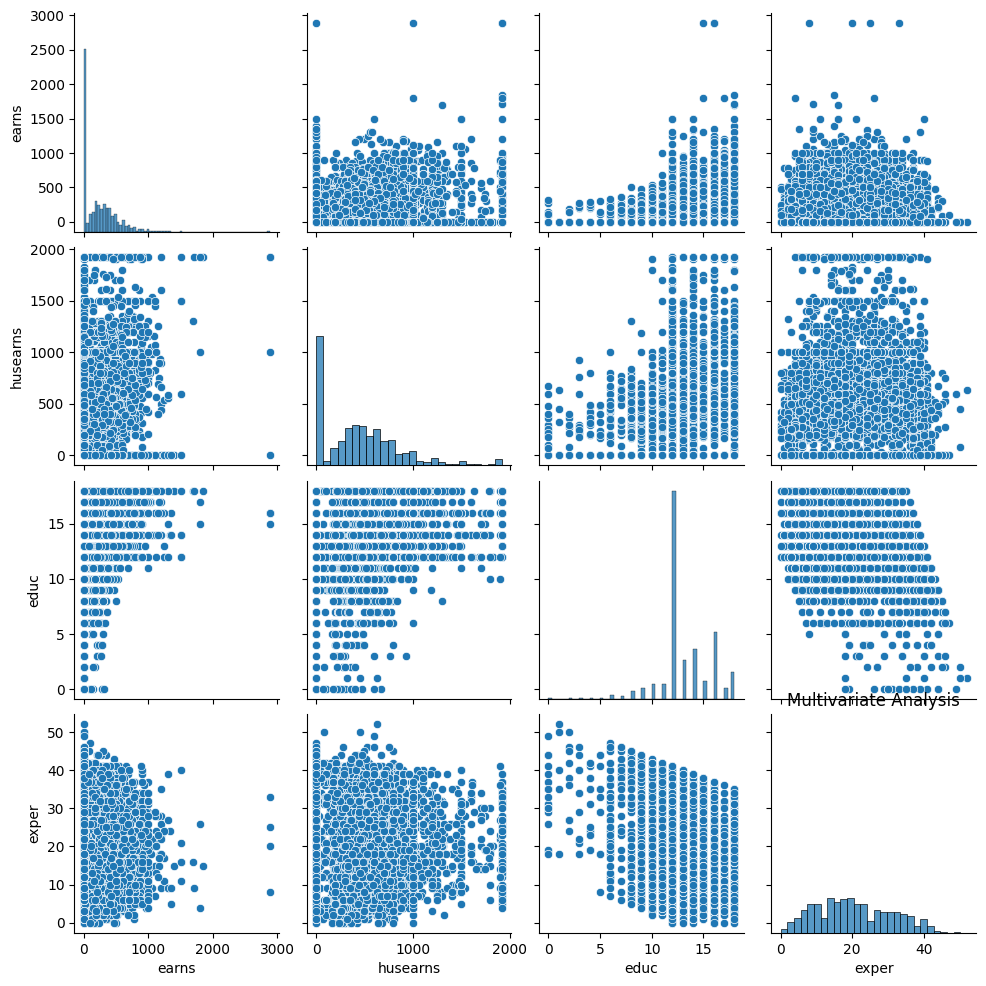

In [ ]:
# Multivariate Analysis
sns.pairplot(df[['earns', 'husearns', 'educ', 'exper']])
plt.title('Multivariate Analysis')
plt.show()

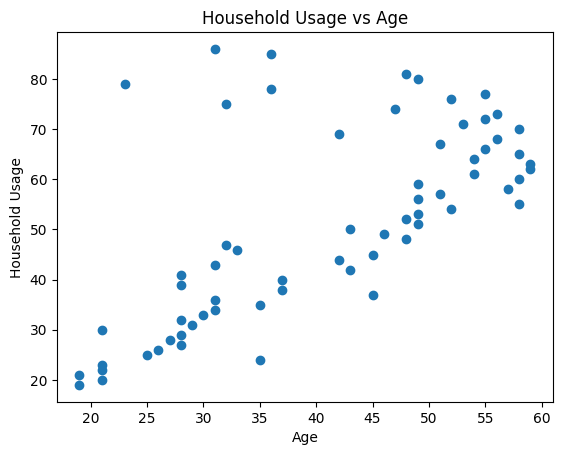

In [ ]:
# Time Series Analysis
# Visualizing relationship between age and usage
plt.plot(df['age'], df['husage'], 'o')
plt.title('Household Usage vs Age')
plt.xlabel('Age')
plt.ylabel('Household Usage')
plt.show()

In [ ]:
# Time-Based Indexing and Resampling
monthly_data = df.select_dtypes(include=np.number).resample('M').mean()

<ipython-input-16-ecec8cc36c07>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.select_dtypes(include=np.number).resample('M').mean()


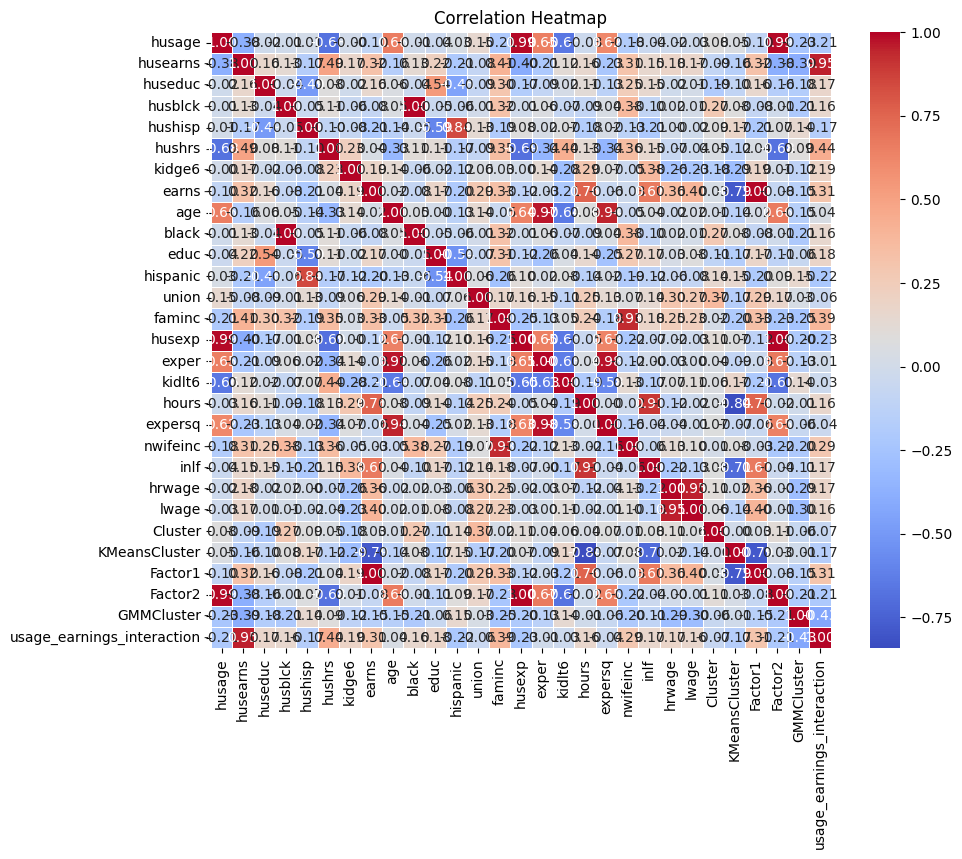

In [85]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

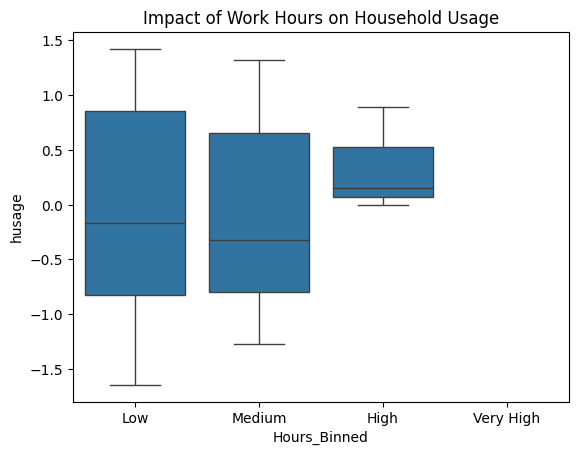

In [86]:
# Simulating seasonal trends: effect of binned hours on usage
sns.boxplot(x='Hours_Binned', y='husage', data=df)
plt.title('Impact of Work Hours on Household Usage')
plt.show()

Module 4: Data Summarization and Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Statistical Summary
print(df.describe())

            husage     husunion     husearns      huseduc      husblck  \
count  5634.000000  5634.000000  5634.000000  5634.000000  5634.000000   
mean     42.452964     0.232401   453.540646    13.147675     0.059460   
std      11.228167     0.362440   406.987817     2.977194     0.236505   
min      19.000000     0.000000     0.000000     0.000000     0.000000   
25%      34.000000     0.000000     0.000000    12.000000     0.000000   
50%      41.000000     0.000000   418.500000    12.000000     0.000000   
75%      50.000000     0.232401   675.000000    16.000000     0.000000   
max      86.000000     1.000000  1923.000000    18.000000     1.000000   

           hushisp       hushrs       kidge6        earns          age  ...  \
count  5634.000000  5634.000000  5634.000000  5634.000000  5634.000000  ...   
mean      0.066205    37.883387     0.307597   232.832978    39.427583  ...   
std       0.248662    19.588200     0.461540   263.326465     9.987610  ...   
min       0.00000

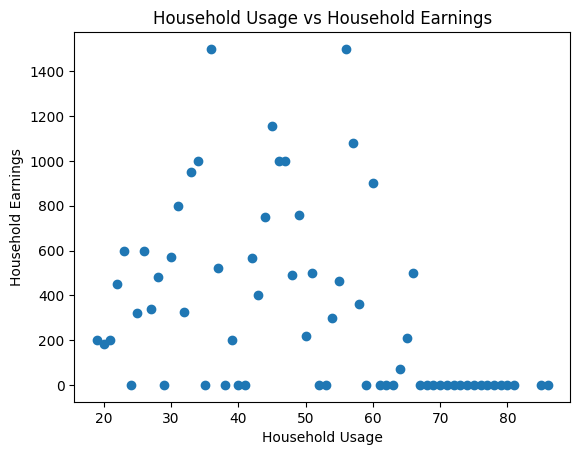

In [ ]:
# 2-D Statistical Analysis: Scatter plot of 'husage' vs 'husearns'
plt.scatter(df['husage'], df['husearns'])
plt.title('Household Usage vs Household Earnings')
plt.xlabel('Household Usage')
plt.ylabel('Household Earnings')
plt.show()

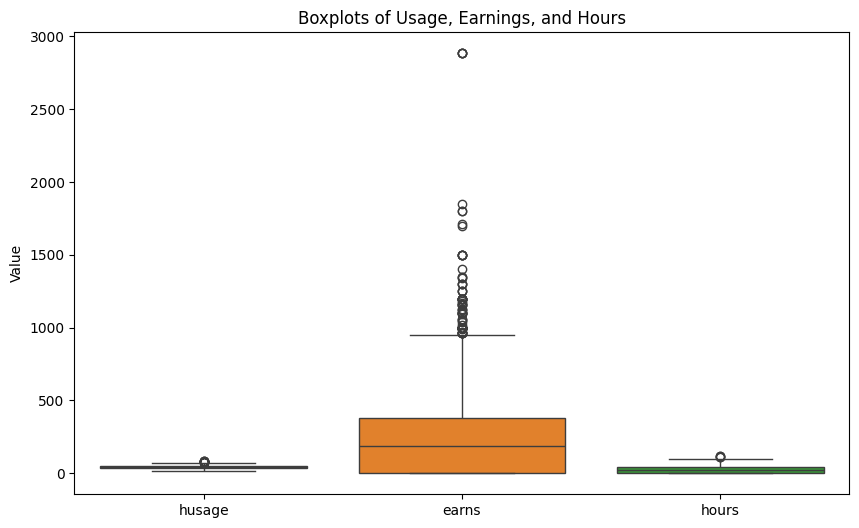

In [ ]:
# Visualizing the distribution of 'husage', 'earns', and 'hours' using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['husage', 'earns', 'hours']])
plt.title('Boxplots of Usage, Earnings, and Hours')
plt.ylabel('Value')
plt.show()

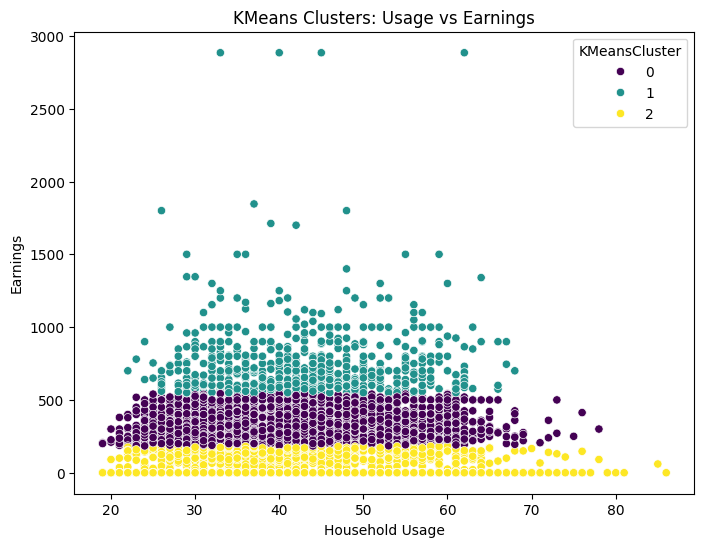

In [ ]:
# Visualizing clusters formed by KMeans on selected features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='husage', y='earns', hue='KMeansCluster', palette='viridis')
plt.title('KMeans Clusters: Usage vs Earnings')
plt.xlabel('Household Usage')
plt.ylabel('Earnings')
plt.show()

<ipython-input-60-84271609998f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KMeansCluster', data=df, palette='Blues')


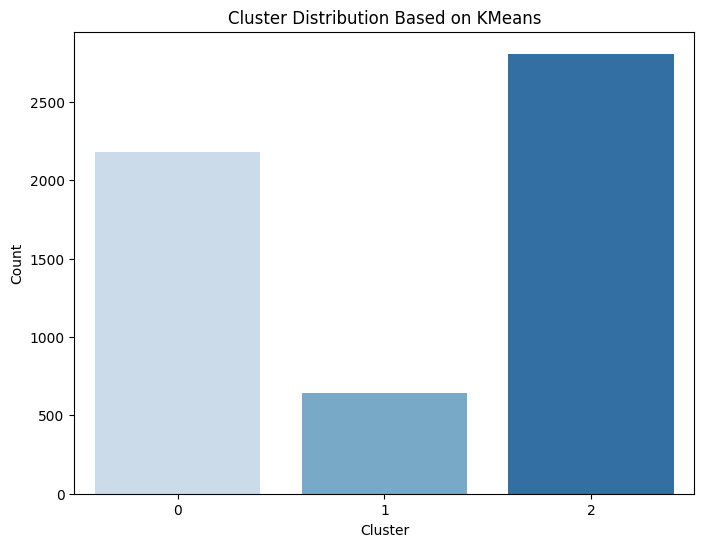

In [ ]:
# Creating a bar plot to visualize cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='KMeansCluster', data=df, palette='Blues')
plt.title('Cluster Distribution Based on KMeans')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

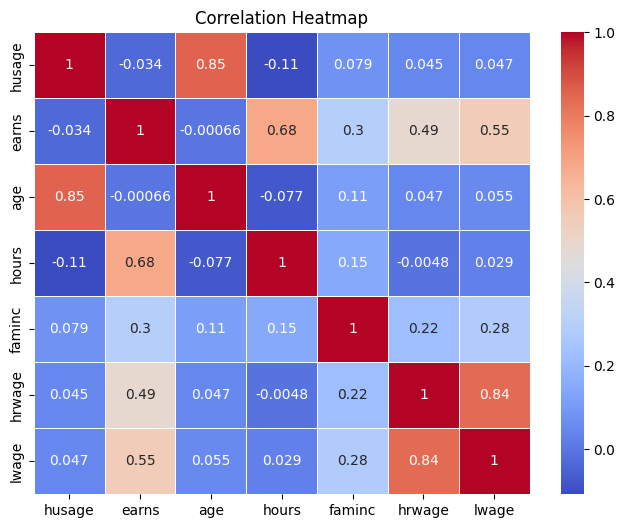

In [ ]:
# Visualizing correlation between features
corr_matrix = df[['husage', 'earns', 'age', 'hours', 'faminc', 'hrwage', 'lwage']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

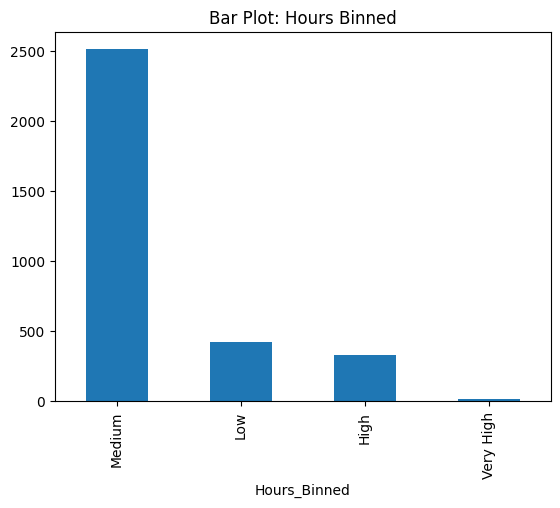

In [ ]:
df['Hours_Binned'].value_counts().plot(kind='bar', title='Bar Plot: Hours Binned')
plt.show()

<ipython-input-62-4ea1eb88265f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='KMeansCluster', y='husage', jitter=True, palette='Set2')


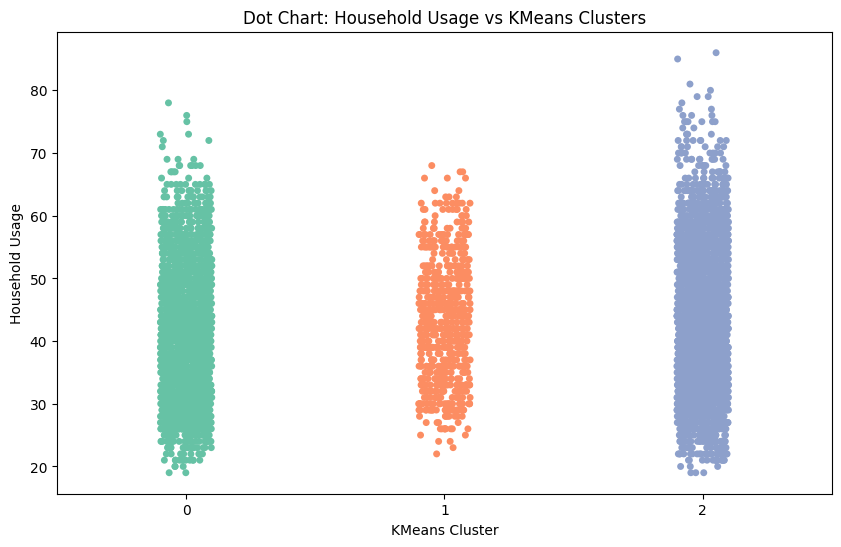

In [ ]:
# Dot chart to show distribution of 'husage' by 'KMeansCluster'
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='KMeansCluster', y='husage', jitter=True, palette='Set2')
plt.title('Dot Chart: Household Usage vs KMeans Clusters')
plt.xlabel('KMeans Cluster')
plt.ylabel('Household Usage')
plt.show()

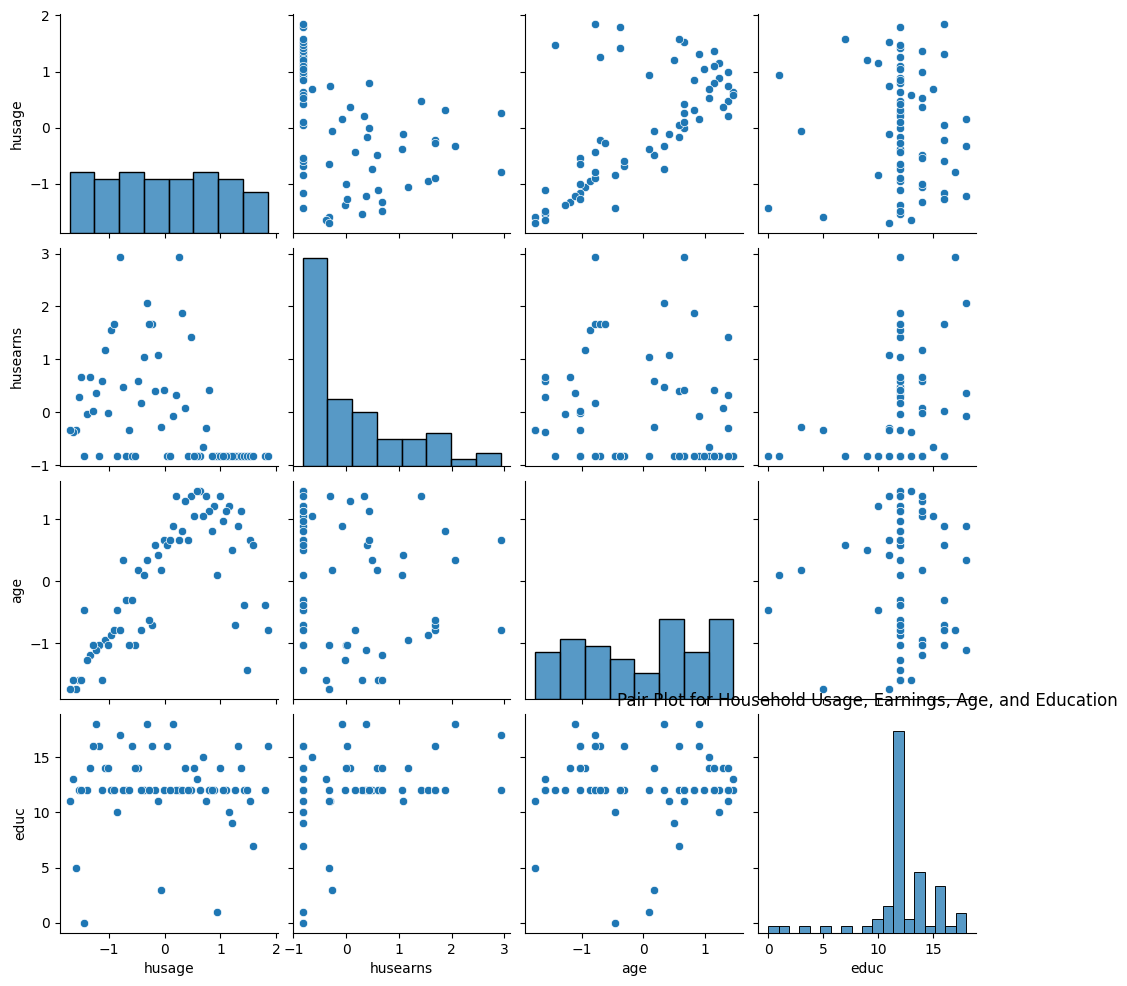

In [90]:
# Pair plot for multiple continuous features
sns.pairplot(df[['husage', 'husearns', 'age', 'educ']])
plt.title('Pair Plot for Household Usage, Earnings, Age, and Education')
plt.show()

Module 5: Clustering Algorithms


In [ ]:
from sklearn.cluster import SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0)
df['Cluster'] = spectral.fit_predict(df[['hours', 'earns']])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


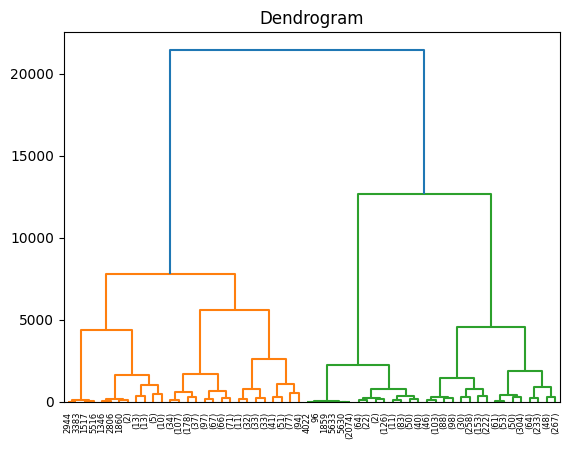

In [ ]:
# Minimum Spanning Tree Clustering
link = linkage(df[['hours', 'earns']], method='ward')
dendrogram(link, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.show()

In [ ]:
# Outlier Detection Using Clustering (Example: KMeans)
kmeans = KMeans(n_clusters=3, random_state=0)
df['KMeansCluster'] = kmeans.fit_predict(df[['hours', 'earns']])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
numerical_features = ['husage', 'earns', 'age', 'hours', 'faminc', 'hrwage']

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [ ]:
# Fit the KMeans model on the selected features
df['Cluster'] = kmeans.fit_predict(df[numerical_features])

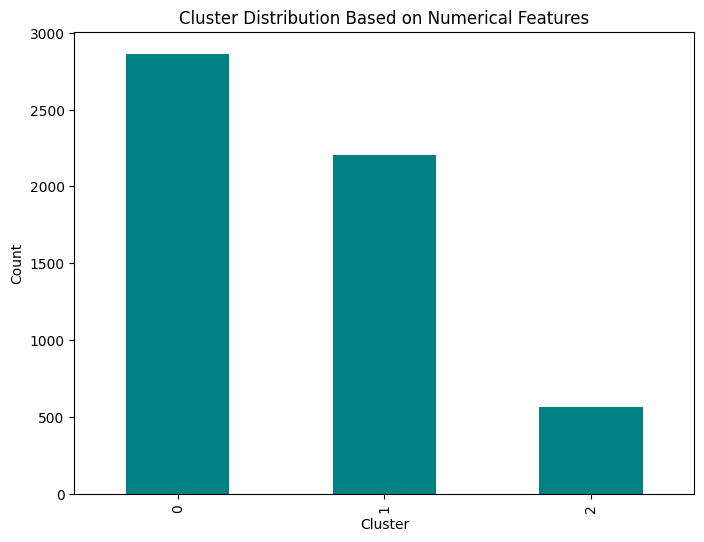

In [ ]:
# Visualizing the cluster distribution
plt.figure(figsize=(8, 6))
df['Cluster'].value_counts().plot(kind='bar', color='teal')
plt.title('Cluster Distribution Based on Numerical Features')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
# Applying Expectation-Maximization (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMMCluster'] = gmm.fit_predict(df[['husage', 'husearns']])

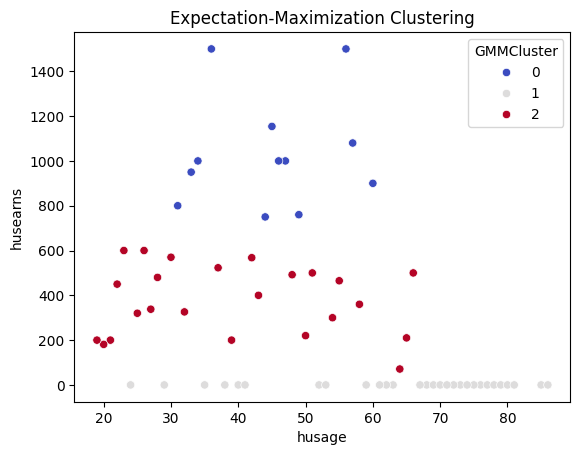

In [ ]:
# Visualizing the GMM clusters
sns.scatterplot(x='husage', y='husearns', hue='GMMCluster', data=df, palette='coolwarm')
plt.title('Expectation-Maximization Clustering')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Hierarchical clustering
Z = linkage(df[['husage', 'husearns']], 'ward')

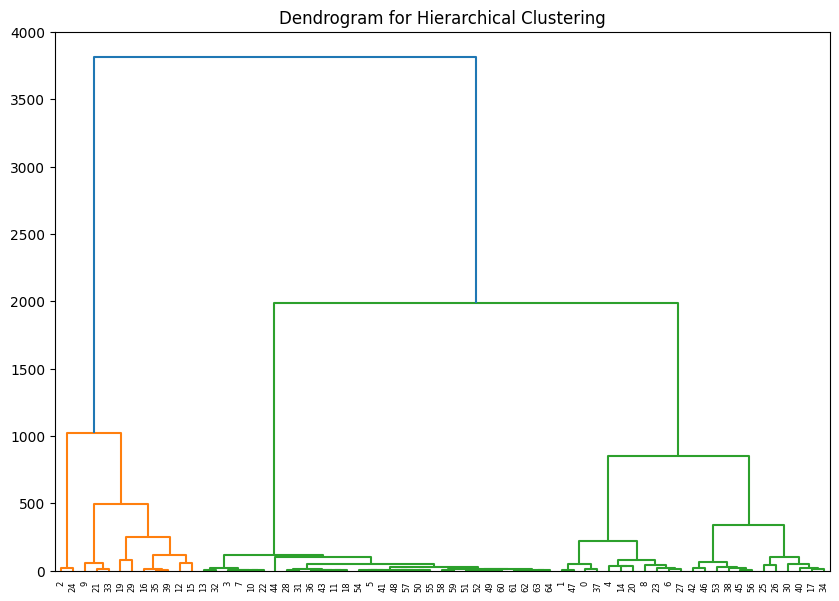

In [ ]:
# Dendrogram visualization
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

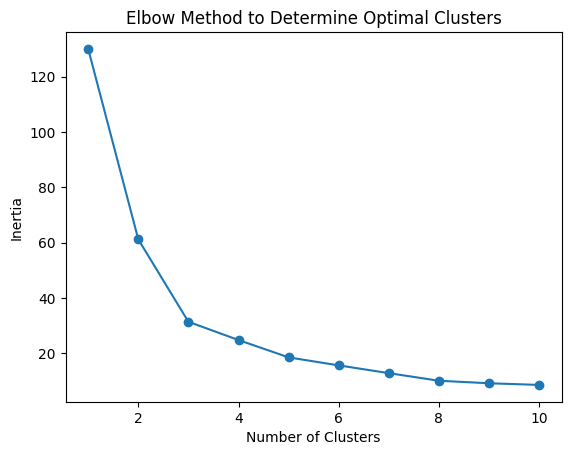

In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['husage', 'husearns']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Module 6: Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.decomposition import FactorAnalysis

In [ ]:
# PCA on selected columns
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['husage', 'husearns']])
print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)

Explained Variance Ratio (PCA): [0.99808719 0.00191281]


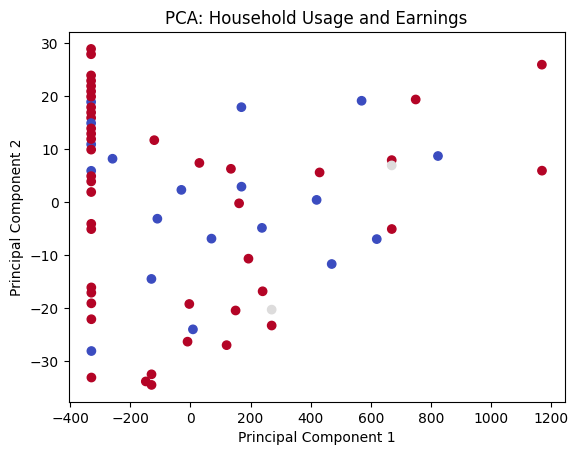

In [ ]:
# Visualizing PCA result
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['KMeansCluster'], cmap='coolwarm')
plt.title('PCA: Household Usage and Earnings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
numerical_cols = numerical_cols.drop('rownames', errors='ignore')

# Perform PCA on the selected numerical columns
pca = PCA()
pca.fit(df[numerical_cols])

PCA()

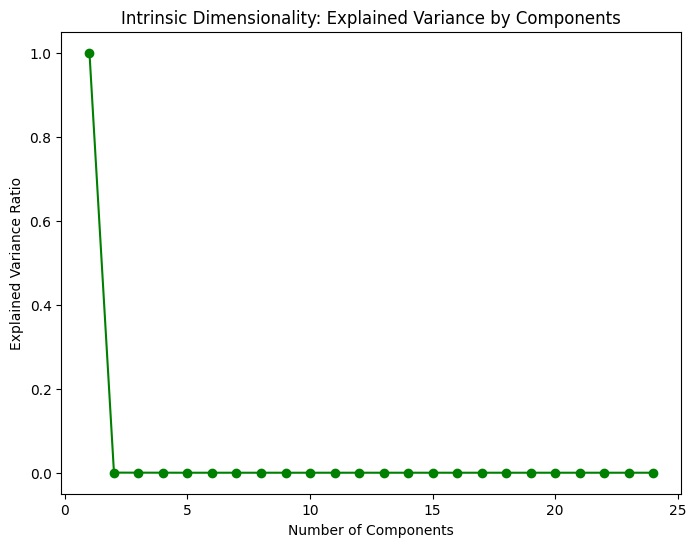

In [ ]:
# Explained variance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', color='green')
plt.title('Intrinsic Dimensionality: Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
# SVD
svd = TruncatedSVD(n_components=2)
df_svd = svd.fit_transform(df[['educ', 'exper', 'earns']])

In [ ]:
# Selecting numerical columns
numerical_cols = ['earns', 'age', 'educ', 'husexp', 'hours']
fa = FactorAnalysis(n_components=2, random_state=42)
df['Factor1'], df['Factor2'] = fa.fit_transform(df[numerical_cols]).T

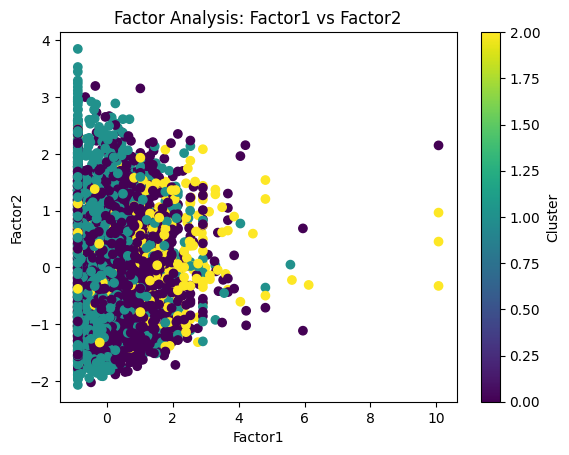

In [ ]:
# Visualizing factor analysis
plt.scatter(df['Factor1'], df['Factor2'], c=df['Cluster'], cmap='viridis')
plt.title('Factor Analysis: Factor1 vs Factor2')
plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.colorbar(label='Cluster')
plt.show()

In [92]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecting top 5 features using ANOVA F-statistic
selector = SelectKBest(f_classif, k=5)
selected_features = selector.fit_transform(df[['husage', 'husearns', 'age', 'educ', 'hours']], df['KMeansCluster'])
print("Top 5 selected features:", selector.get_support(indices=True))

Top 5 selected features: [0 1 2 3 4]


Module 7: Model Development and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Splitting data for training
X = df[['husearns']]
y = df['husage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making predictions
y_pred = regressor.predict(X_test)

In [ ]:
# Evaluate Model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 350.5570873100656
R² Score: 0.18752368749278525


In [ ]:
# Reinforcement Learning Basics
print("Reinforcement learning focuses on learning optimal actions through rewards.")


Reinforcement learning focuses on learning optimal actions through rewards.


In [ ]:
import numpy as np

In [ ]:
# Q-learning simulation for decision-making in `union` outcomes
states = df['union'].unique()
actions = df['huseduc'].unique()
q_table = np.zeros((len(states), len(actions)))

In [ ]:
# Simulating rewards and updates
for _ in range(100):
    state = np.random.choice(states)
    action = np.random.choice(actions)
    reward = np.random.choice([1, -1])
    state_index = np.where(states == state)[0][0]
    action_index = np.where(actions == action)[0][0]
    q_table[state_index, action_index] += reward

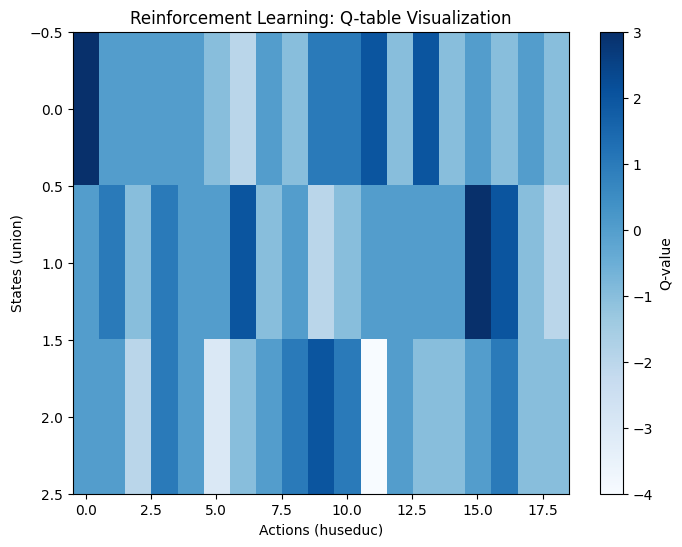

In [ ]:
# Visualizing the Q-table
plt.figure(figsize=(8, 6))
plt.imshow(q_table, cmap='Blues', aspect='auto')
plt.colorbar(label='Q-value')
plt.title('Reinforcement Learning: Q-table Visualization')
plt.xlabel('Actions (huseduc)')
plt.ylabel('States (union)')
plt.show()

In [93]:
from sklearn.model_selection import cross_val_score

# Cross-validation for linear regression model
cv_scores = cross_val_score(regressor, X[['husearns']], y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation MSE scores: {cv_scores}')

Cross-validation MSE scores: [-277.24933263 -292.28731345 -225.96406829 -301.9690393  -760.65009737]


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Tuning hyperparameters for Ridge regression model
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X[['husearns']], y)
print(f'Best parameters for Ridge regression: {grid_search.best_params_}')

Best parameters for Ridge regression: {'alpha': 100}


In [95]:
from sklearn.metrics import r2_score

# Evaluate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.18752368749278525
